# CubicGalileonEmu

> GP emulator for boost factor in cubic Galileon gravity model

Modified Gravity emulator for boost in the dark matter power spectra

## Install

(not installable yet)
```sh
pip install CubicGalileonEmu
```

## Basic rundown

### A few imports 

In [ ]:
from CubicGalileonEmu.load import *
from CubicGalileonEmu.viz import *
from CubicGalileonEmu.pca import *
from CubicGalileonEmu.gp import *
from CubicGalileonEmu.emu import *

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

### Loading files

In [ ]:
Bk_all, k_all, z_all = load_boost_training()
p_all = load_params()

exclude = 35
Bk_all = np.delete(Bk_all, exclude, axis=0)
p_all = np.delete(p_all, exclude, axis=0)

### A few plotting routines

#### Experimental design

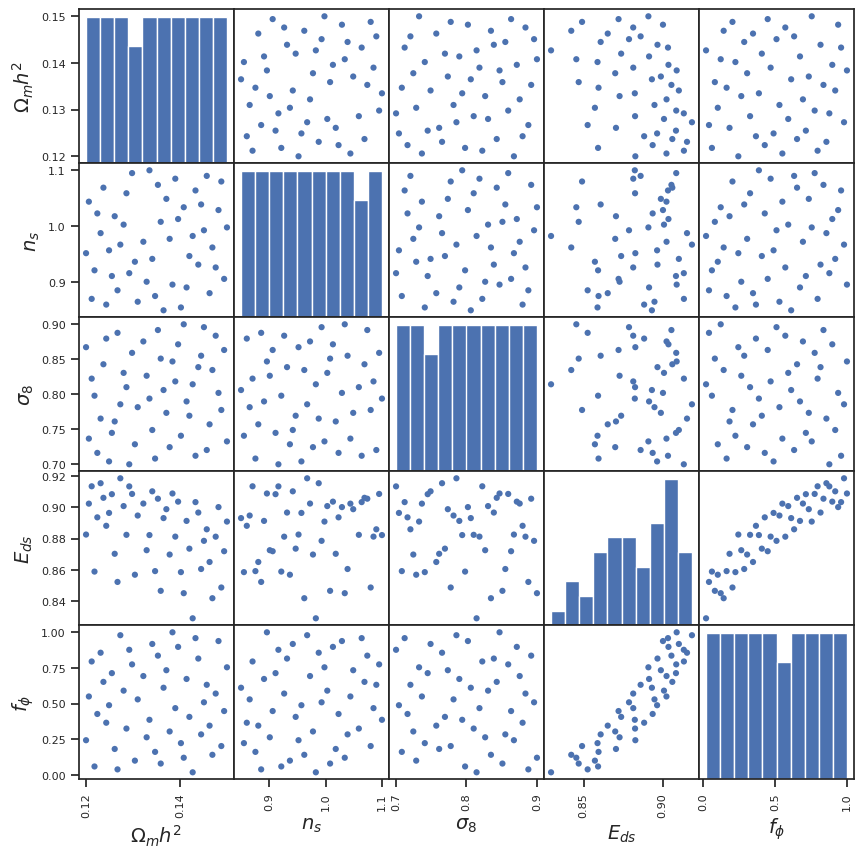

In [ ]:
df_train_a = pd.DataFrame(p_all, columns=PARAM_NAME)
colors = ['b']*p_all.shape[0]
# colors = ['b']*num_sims + ['r']*num_sims_test
plot_scatter_matrix(df_train_a, colors);

#### Boost metrics colored by cosmology parameters

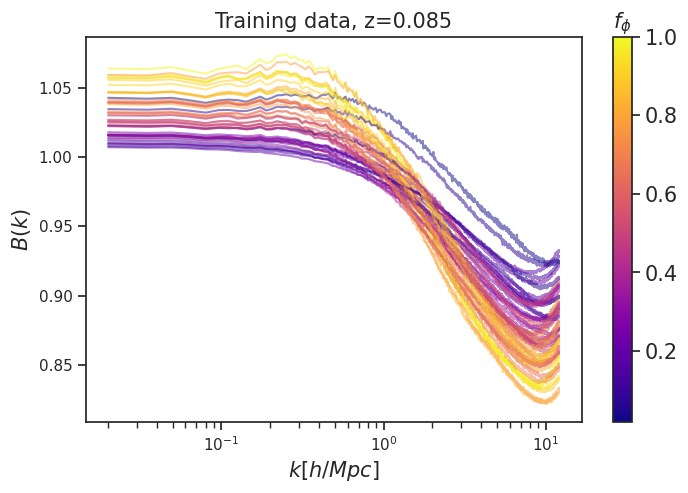

In [ ]:
color_by_index = 4
z_index = 0

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$B(k)$', 
                            PARAM_NAME[color_by_index]);

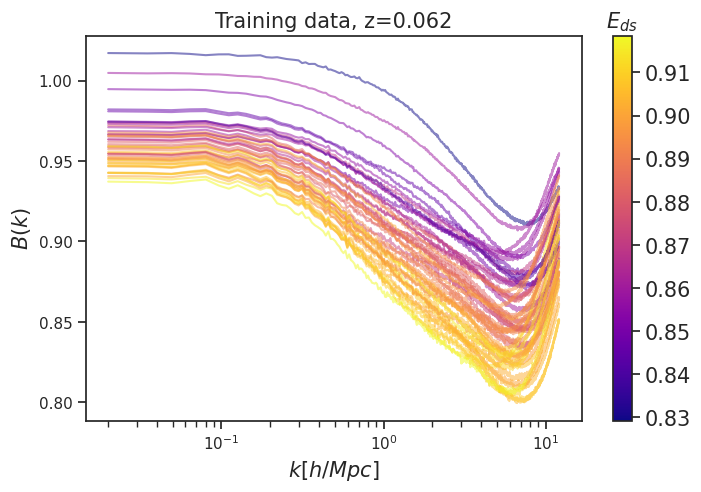

In [ ]:
color_by_index = 3
z_index = 21

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$B(k)$', 
                            PARAM_NAME[color_by_index]);

### Training involves: PCA, GP fitting.  

In [ ]:
## Data prep
z_index = 1
y_vals = Bk_all[:, z_index, :]
# y_ind = np.arange(0, y_vals.shape[1])
y_ind = k_all

# Train-test split
test_indices = [0, 14, 35]
input_params= p_all[test_indices]
target_vals = Bk_all[:, z_index, :][test_indices]

train_indices = [i for i in  np.arange(49) if i not in test_indices] 
p_all_train = p_all[train_indices]
y_vals_train = Bk_all[:, z_index, :][train_indices]

In [ ]:
sepia_data = sepia_data_format(p_all_train, y_vals_train, y_ind)
print(sepia_data)
model_filename = '../CubicGalileonEmu/model/multivariate_model_z_index' + str(z_index) 

sepia_model = do_pca(sepia_data, exp_variance=0.95)
sepia_model = do_gp_train(sepia_model, model_filename)

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    46 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.86it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.36172859 0.83906751]
 [0.55032439 0.50906238]
 [0.08481052 0.07005754]
 [0.22542759 0.2624224 ]
 [0.76705568 0.29715812]
 [0.05368846 2.55503806]]
lamUz
[[0.53342174 0.76374614]]
lamWs
[[4243.40287283 3428.29930067]]
lamWOs
[[5.41732592]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 146.69it/s]

Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index1.pkl


### Load existing model

In [ ]:
sepia_model = gp_load(sepia_model, model_filename)

No thetas to plot


(None, <Figure size 1000x750 with 5 Axes>)

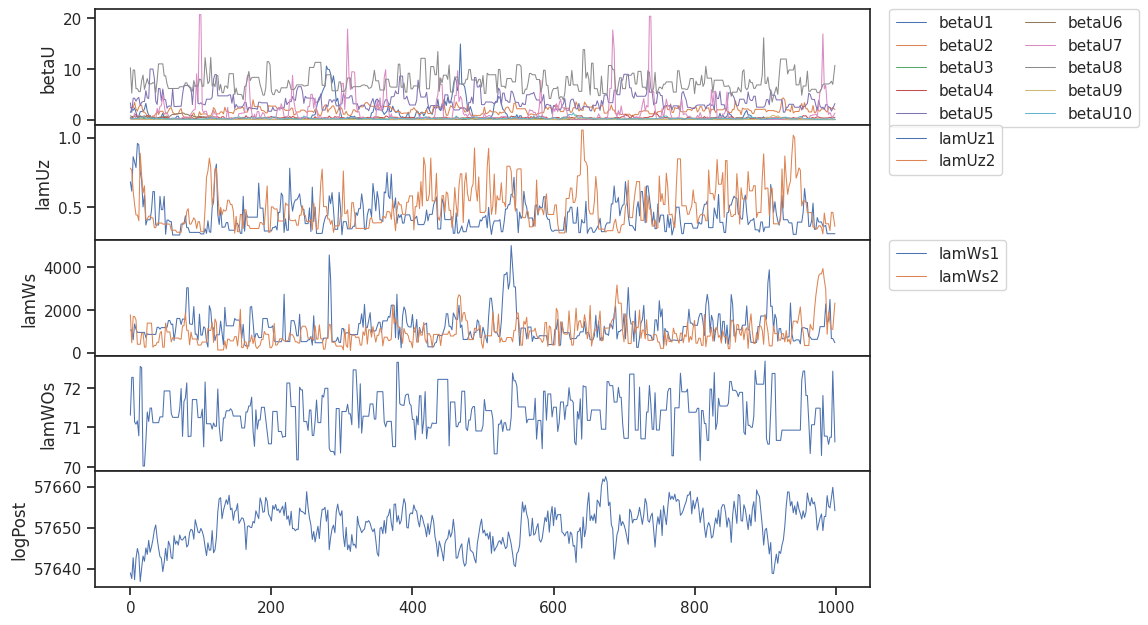

In [ ]:
plot_train_diagnostics(sepia_model)

### Single-redshift emulation for new cosmological parameters

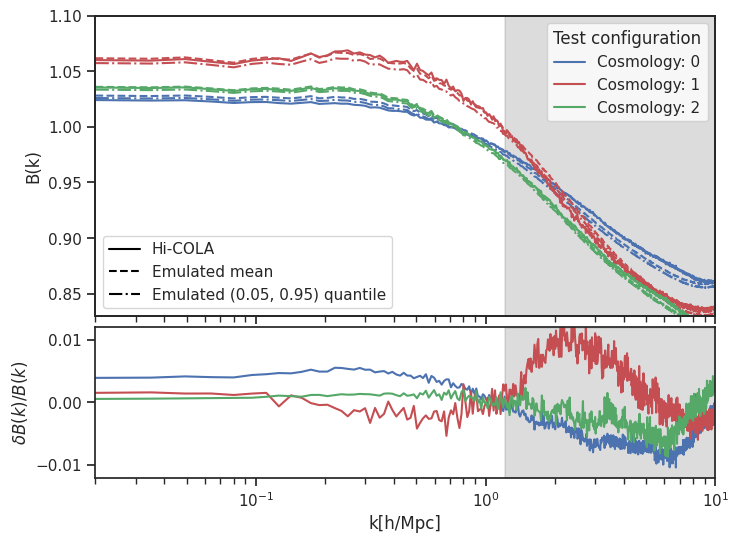

In [ ]:
pred_mean, pred_quant = emulate(sepia_model, input_params)
validation_plot(k_all, target_vals, pred_mean, pred_quant);

### Sensitivity analysis from the emulator 

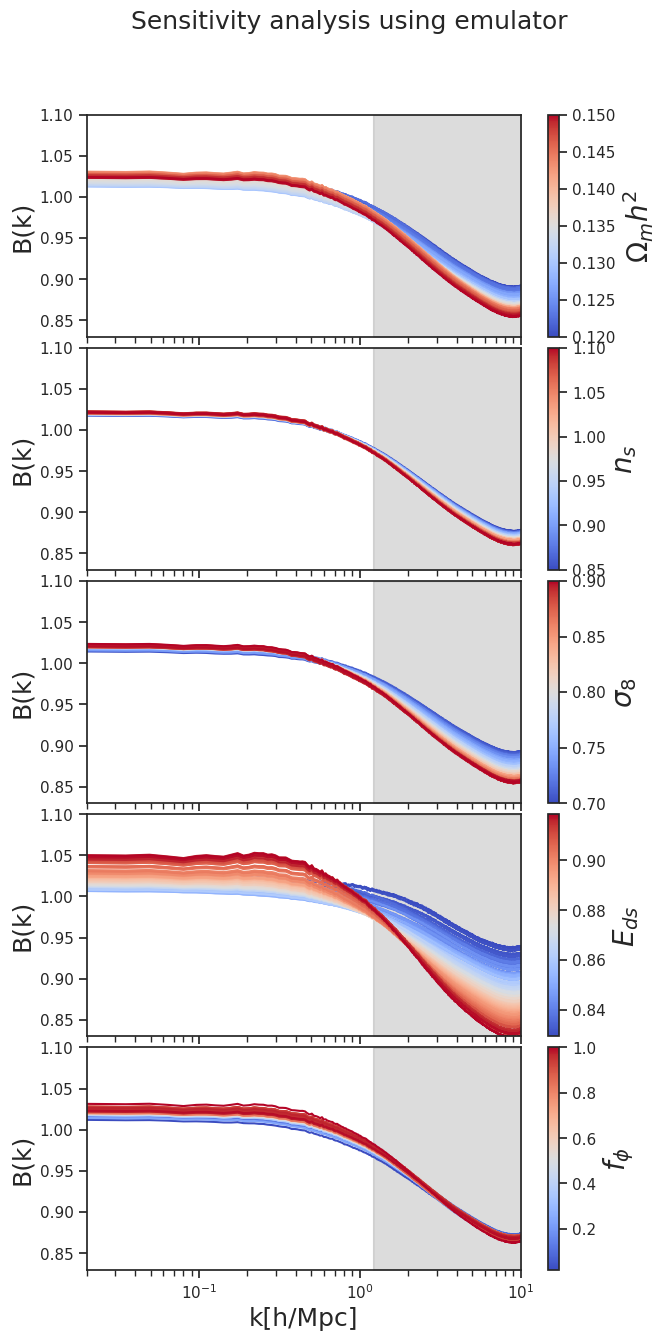

In [ ]:
f = sensitivity_plot(k_all, p_all, sepia_model, emulate, PARAM_NAME)

### Multi-redshift emulation (not part of the emulator yet)

#### Train all the models

In [ ]:
do_gp_train_multiple(model_dir='../CubicGalileonEmu/model/', 
                     p_train_all = p_all[train_indices],
                     y_vals_all = Bk_all[train_indices],
                     y_ind_all = k_all,
                     z_index_range=np.arange(48, 51))

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.92it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.10956236 0.75903123]
 [0.1760089  0.64478352]
 [0.10288233 0.18735706]
 [0.1500983  0.4673991 ]
 [0.71482425 0.96531397]
 [0.20030176 0.19134737]]
lamUz
[[0.51981198 0.98183327]]
lamWs
[[1837.26523832 3597.16393655]]
lamWOs
[[0.00726414]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 145.53it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index48.pkl
Training complete for snapshot 48
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.90it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.50171254 0.53361435]
 [0.41673667 0.6066429 ]
 [0.09855149 0.08816531]
 [0.16969914 0.37349414]
 [0.70513709 0.78447818]
 [0.11201776 0.05677843]]
lamUz
[[0.79664894 0.63367493]]
lamWs
[[2269.80851959 4631.87482258]]
lamWOs
[[0.00081974]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 140.42it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index49.pkl
Training complete for snapshot 49
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.00it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.23222876 0.51034858]
 [0.55509435 0.59481587]
 [0.04737782 0.10380857]
 [0.11710294 0.56156201]
 [0.63278296 0.84933298]
 [0.11145392 0.09956732]]
lamUz
[[0.98253606 0.93624153]]
lamWs
[[4710.78652198 3213.59636638]]
lamWOs
[[0.08658665]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 146.28it/s]

Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index50.pkl
Training complete for snapshot 50
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [ ]:
sepia_model_list = load_model_multiple(model_dir='../CubicGalileonEmu/model/', 
                                       p_train_all=p_all,
                                       y_vals_all=Bk_all,
                                       y_ind_all=y_ind,
                                       z_index_range=range(51), 
                                       sepia_model_i=sepia_model)

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (nu

In [ ]:
# def emu_redshift(input_params_and_redshift, sepia_model_list):
    
#     z = input_params_and_redshift[:, -1]
#     input_params = input_params_and_redshift[:, :-1]
    
#     print(input_params.shape)
#     print(z)
    
#     '''
#     if (z == 0):
#         # No redshift interpolation for z=0
#         GPm, PCAm = model_load(snap_ID=LAST_SNAP, nRankMax=DEFAULT_PCA_RANK)
#         Pk_interp = emulate(sepia_model, input_params)
        
        
#     else:
#     '''
    
#     # Linear interpolation between z1 < z < z2
#     snap_idx_nearest = (np.abs(z_all - z)).argmin()
#     if (z > z_all[snap_idx_nearest]):
#         snap_ID_z1 = snap_idx_nearest - 1
#     else:
#         snap_ID_z1 = snap_idx_nearest
#     snap_ID_z2 = snap_ID_z1 + 1
    
#     print('SNAP ID: ', snap_ID_z1, snap_ID_z2)
#     print('IP: ', input_params.shape)
    
    
#     sepia_model_z1 = sepia_model_list[snap_ID_z1]
#     Bk_z1, _ = emulate(sepia_model_z1, input_params)
#     z1 = z_all[snap_ID_z1]
    

#     sepia_model_z2 = sepia_model_list[snap_ID_z2]
#     Bk_z2, _ = emulate(sepia_model_z2, input_params)
#     z2 = z_all[snap_ID_z2]

#     Bk_interp = np.zeros_like(Bk_z1)
#     Bk_interp = Bk_z2 + (Bk_z1 - Bk_z2)*(z - z2)/(z1 - z2)
    
#     return Bk_interp

In [ ]:
input_params0 = input_params[0]
z_inputs = 0.1234
input_params_and_redshift = np.append(input_params0, z_inputs)

In [ ]:
emr = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)

(1, 5)
[0.1234]
SNAP ID:  2 3
IP:  (1, 5)


<matplotlib.legend.Legend>

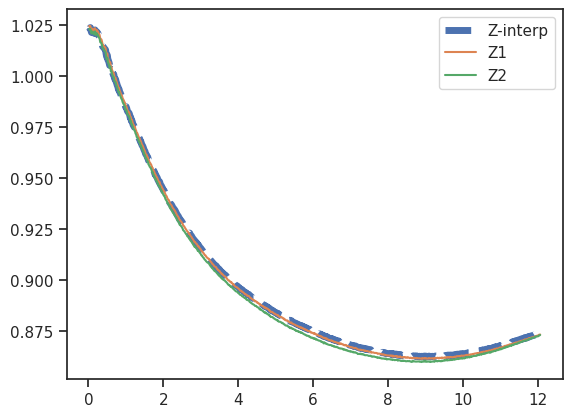

In [ ]:
plt.plot(k_all, emr[:, 0], label='Z-interp', lw=5, ls='--')
plt.plot(k_all, emulate(sepia_model_list[2], input_params_and_redshift[:-1])[0], label='Z1')
plt.plot(k_all, emulate(sepia_model_list[3], input_params_and_redshift[:-1])[0], label='Z2')
plt.legend()
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))

In [ ]:
sepia_model_list[0]

<sepia.SepiaModel.SepiaModel>

### Parameter inference using the emulator (not implemented yet)